In [ ]:
# from google.colab import drive

# drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# !pip install fastaudio
# !pip install fastai==2.5.2
# !pip install matplotlib==3.2.2
# !pip install scikit-learn==1.0.2

In [ ]:
from fastai.vision.all import *
from fastaudio.core.all import *
from fastaudio.augment.all import *
from fastaudio.ci import skip_if_ci

/usr/local/lib/python3.7/dist-packages/torchaudio/backend/utils.py:47: UserWarning: "torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. Please remove the use of flag.
  '"torchaudio.USE_SOUNDFILE_LEGACY_INTERFACE" flag is deprecated and will be removed in 0.9.0. '


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from imblearn.metrics import specificity_score

In [ ]:
# import os
# import sys
# import subprocess
# import numpy as np
# import glob
# import json
# import pandas as pd

# '''
# This script creates a folder "Extracted_data" inside which it extracts all the wav files in the directories date-wise
# '''

# coswara_data_dir = os.path.abspath('/content/gdrive/MyDrive/thesisDatasets/Coswara/github/') # Local Path of iiscleap/Coswara-Data Repo
# extracted_data_dir = os.path.join('/content/gdrive/MyDrive/thesisDatasets/Coswara/', 'Extracted_data')  

# if not os.path.exists(coswara_data_dir):
#     raise("Check the Coswara dataset directory!")

# if not os.path.exists(extracted_data_dir):
#     os.makedirs(extracted_data_dir) # Creates the Extracted_data folder if it doesn't exist

# dirs_extracted = set(map(os.path.basename,glob.glob('{}/202*'.format(extracted_data_dir))))
# dirs_all = set(map(os.path.basename,glob.glob('{}/202*'.format(coswara_data_dir))))

# dirs_to_extract = list(set(dirs_all) - dirs_extracted)

# for d in dirs_to_extract:
#     p = subprocess.Popen('cat {}/{}/*.tar.gz.* |tar -xvz -C {}/'.format(coswara_data_dir, d, extracted_data_dir), shell=True)
#     p.wait()


# print("Extraction process complete!")

# Preprocessing

In [ ]:
COS_loc = "/content/gdrive/MyDrive/Thesis/Coswara/"
COS_data = "/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/"

In [ ]:
cos_df = pd.read_csv('/content/gdrive/MyDrive/Thesis/Coswara/github/combined_data.csv')
cos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2233 entries, 0 to 2232
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2233 non-null   object 
 1   a                2233 non-null   int64  
 2   covid_status     2233 non-null   object 
 3   record_date      2233 non-null   object 
 4   ep               2233 non-null   object 
 5   g                2233 non-null   object 
 6   l_c              2233 non-null   object 
 7   l_l              1994 non-null   object 
 8   l_s              2233 non-null   object 
 9   rU               1553 non-null   object 
 10  smoker           573 non-null    object 
 11  cold             291 non-null    object 
 12  ht               183 non-null    object 
 13  diabetes         191 non-null    object 
 14  cough            385 non-null    object 
 15  ctDate           134 non-null    object 
 16  ctScan           450 non-null    object 
 17  ctScore       

In [ ]:
cos_df = cos_df[["id", "covid_status", "test_status", "others_resp", "asthma",  "pneumonia", "cld"]]
cos_df[:5]

,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


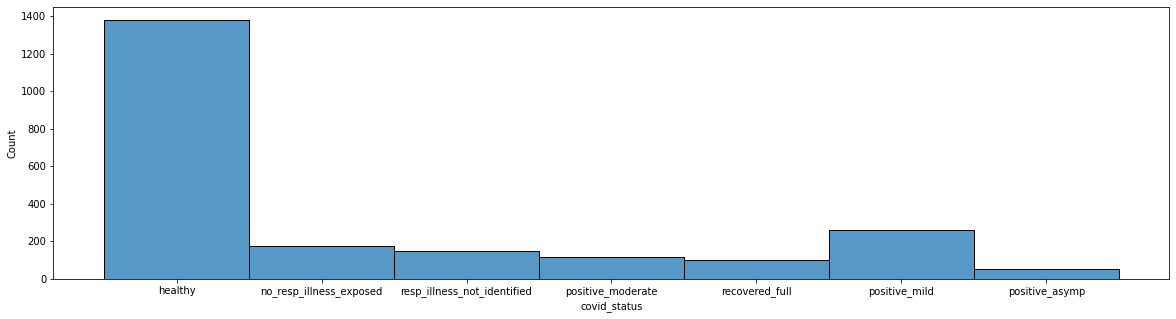

In [ ]:
plt.figure(figsize=(20,5))
sns.histplot(cos_df['covid_status'])

In [ ]:
# only covid positive & no respiratory problems samples

cos_covid = cos_df[( (cos_df.covid_status == 'positive_mild') 
                    | (cos_df.covid_status=='positive_asymp')
                    | (cos_df.covid_status =='positive_moderate') ) 
                  ]

#cos_covid.to_csv('cos_covid.csv')

print('SAMPLES: -->',len(cos_covid))
cos_covid.info()
cos_covid[:5]

SAMPLES: --> 430
<class 'pandas.core.frame.DataFrame'>
Int64Index: 430 entries, 28 to 2232
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            430 non-null    object
 1   covid_status  430 non-null    object
 2   test_status   335 non-null    object
 3   others_resp   10 non-null     object
 4   asthma        9 non-null      object
 5   pneumonia     12 non-null     object
 6   cld           4 non-null      object
dtypes: object(7)
memory usage: 26.9+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
28,9hXEs9OejdVxG6JJGCyKQpqVvy43,positive_moderate,p,NaN,NaN,NaN,NaN
33,XbOUJCUl8GWEpQpIRMvujDE1sTE2,positive_moderate,p,NaN,NaN,NaN,NaN
34,Qcliznd3z1VdWmJOZh9nvlstTYv1,positive_moderate,p,NaN,NaN,NaN,NaN
36,AutXsDVtEcVH9ZQ58NqDunDcqZv1,positive_mild,p,True,NaN,NaN,NaN
37,dFtGnzYqh1NVAwQUQ3wkysqAe3n1,positive_asymp,p,NaN,NaN,NaN,NaN


In [ ]:
# covid healthy & no respiratory problems samples (1359 + 170)

cos_healthy = cos_df[( (cos_df.covid_status == "healthy") 
                      | (cos_df.covid_status == "no_resp_illness_exposed") )
                    ]

#cos_healthy.to_csv('cos_healthy.csv')

print('SAMPLES: -->',len(cos_healthy))
cos_healthy.info()
cos_healthy[:5]

SAMPLES: --> 1553
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1553 entries, 0 to 2226
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1553 non-null   object
 1   covid_status  1553 non-null   object
 2   test_status   331 non-null    object
 3   others_resp   1 non-null      object
 4   asthma        22 non-null     object
 5   pneumonia     0 non-null      object
 6   cld           1 non-null      object
dtypes: object(7)
memory usage: 97.1+ KB


,id,covid_status,test_status,others_resp,asthma,pneumonia,cld
0,iV3Db6t1T8b7c5HQY2TwxIhjbzD3,healthy,NaN,NaN,NaN,NaN,NaN
1,AxuYWBN0jFVLINCBqIW5aZmGCdu1,healthy,NaN,NaN,NaN,NaN,NaN
2,C5eIsssb9GSkaAgIfsHMHeR6fSh1,healthy,NaN,NaN,NaN,NaN,NaN
3,YjbEAECMBIaZKyfqOvWy5DDImUb2,healthy,NaN,NaN,NaN,NaN,NaN
4,aGOvk4ji0cVqIzCs1jHnzlw2UEy2,healthy,NaN,NaN,NaN,NaN,NaN


In [ ]:
# loads all file paths from location

cos_files = get_files(
  path = COS_data,
  extensions = '.wav',
  recurse = True
)

cos_files

(#19636) [Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-e.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-fast.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-a.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-heavy.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/vowel-o.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/cough-shallow.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/counting-normal.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200430/xa2v8z3Yzgb9dFrq2gEZz6oS7fh1/breathing-deep.wav'),Path('/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/202

In [ ]:
# method to get file paths

def getit(id):
    for i in cos_files:
        folders = str(i).split("/")
        if folders[-1] == 'cough-heavy.wav':
            if folders[-2] == id:
                #print(str(i))
                return str(i)

getit(cos_covid.id.values[0]) 

'/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav'

In [ ]:
# save every audio files and the corresponding label in list

file_names = []
labels = []

for i in cos_covid.id.values:
    file_names.append(getit(i))
    labels.append('COVID POSITIVE')

for i in cos_healthy.id.values:
    file_names.append(getit(i))
    labels.append('COVID NEGATIVE')
    
print(file_names[:3])
print(labels[:3])

Counter(labels)

['/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav', '/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav', '/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav']
['COVID POSITIVE', 'COVID POSITIVE', 'COVID POSITIVE']


Counter({'COVID NEGATIVE': 1553, 'COVID POSITIVE': 430})

In [ ]:
# dataframe for dataloader

df = pd.DataFrame({'filename' : file_names, 'category': labels})
three_df = df.copy()
three_df

,filename,category
0,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/9hXEs9OejdVxG6JJGCyKQpqVvy43/cough-heavy.wav,COVID POSITIVE
1,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/XbOUJCUl8GWEpQpIRMvujDE1sTE2/cough-heavy.wav,COVID POSITIVE
2,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/Qcliznd3z1VdWmJOZh9nvlstTYv1/cough-heavy.wav,COVID POSITIVE
3,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/AutXsDVtEcVH9ZQ58NqDunDcqZv1/cough-heavy.wav,COVID POSITIVE
4,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/dFtGnzYqh1NVAwQUQ3wkysqAe3n1/cough-heavy.wav,COVID POSITIVE
...,...,...
1978,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210714/tfZUfOLuABObiYEbvQPmySozHfg2/cough-heavy.wav,COVID NEGATIVE
1979,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210714/YXt9ERhtqqhCsrni0y61UNue3Yy2/cough-heavy.wav,COVID NEGATIVE
1980,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210714/gGgG540lBOZoSK1vyqNVlqBzQBl1/cough-heavy.wav,COVID NEGATIVE
1981,/content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210714/nx6RCgD0OjdzLa07UHBdHfz54ML2/cough-heavy.wav,COVID NEGATIVE


In [ ]:
# # check audio files samplerate

# sr_list = []

# for i in three_df.filename.values:
#     sr_list.append(librosa.get_samplerate(i))
    
# sr_list = np.array(sr_list)

# values, counts = np.unique(sr_list, return_counts=True)
# print(values, counts)

# # check duration of each files

# dur_list = []
# failed_list = []
# for i in three_df.filename.values:
#     try:
#         y, sr = librosa.load(i)
#         dur_list.append(librosa.get_duration(y=y, sr=sr))
#     except:
#         failed_list.append(i)
#         pass
    
# dur_list = np.array(dur_list)

# print(np.mean(dur_list))
# print(np.average(dur_list))

# # files failed to load
# print(failed_list[:3])
# len(failed_list)

# # remove corrupted files
# for i in failed_list:
#     print(i)
#     three_df.drop(three_df[three_df.filename == i].index, inplace=True)
# three_df

In [ ]:
three_df = three_df.dropna()

COVID NEGATIVE    1527
COVID POSITIVE     418
Name: category, dtype: int64

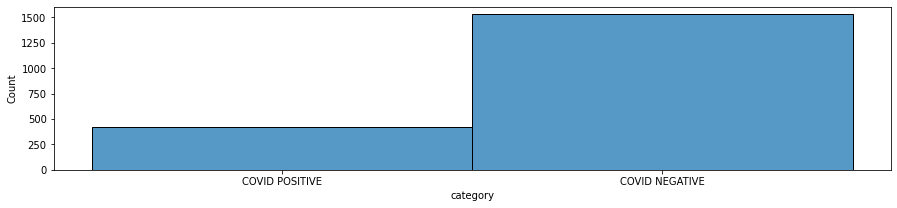

In [ ]:
# check class distribution
plt.figure(figsize=(15,3))
sns.histplot(three_df['category'])

three_df['category'].value_counts()

In [ ]:
three_df.to_csv(COS_data+'coswara_df_2class.csv', index=False) 

# MFCC

In [ ]:
crop6s = ResizeSignal(duration=6000)
aud2mfcc = AudioToMFCC(sample_rate=22050, n_mfcc=70, log_mels=False, 
                       melkwargs={'n_fft':2048, 'hop_length':256,'n_mels':128})

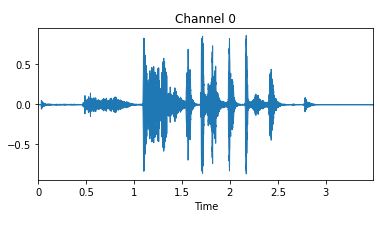

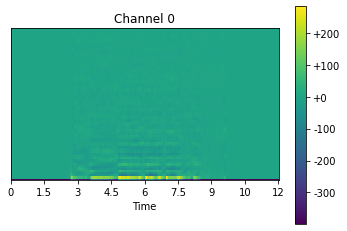

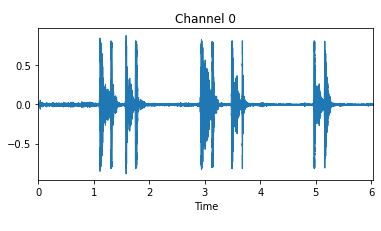

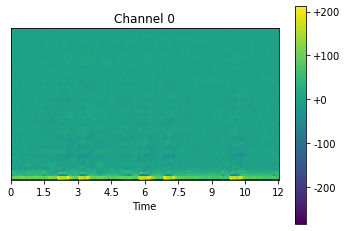

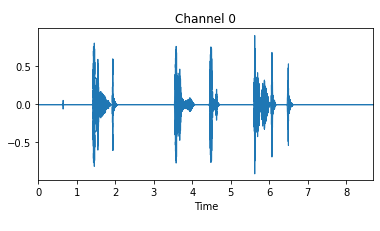

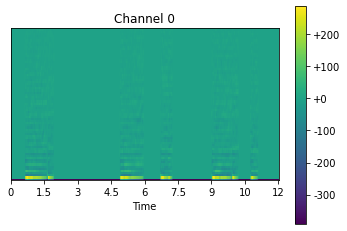

In [ ]:
# check transformations
pipe = Pipeline([AudioTensor.create, crop6s, aud2mfcc])

for fn in three_df.filename.values[42:45]:
      audio = AudioTensor.create(fn)
      audio.show()
      pipe(fn).show()

## Dataloader

In [ ]:
three_df, three_df_test = train_test_split(three_df, test_size=0.15, random_state=69, stratify=three_df.category.values)

In [ ]:
print(three_df.category.value_counts())
print(three_df_test.category.value_counts())

COVID NEGATIVE    1103
COVID POSITIVE     302
Name: category, dtype: int64
COVID NEGATIVE    195
COVID POSITIVE     53
Name: category, dtype: int64


Setting-up type transforms pipelines
1240  /content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200504/0EAAFsDWfTcrhktHy78LS6nf19G3/cough-heavy.wav  COVID NEGATIVE
473   /content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20210816/acNcVO2ualNYfKX5k7tJe2nw40Q2/cough-heavy.wav  COVID NEGATIVE
1343  /content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200413/60Ig4PmU9NMqKGDMR8Um0Tc2KXB3/cough-heavy.wav  COVID NEGATIVE
492   /content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200419/tkr2LeHuJyNXW3uM4NUZBmp1qIb2/cough-heavy.wav  COVID NEGATIVE
1034  /content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200502/LJ7VSEWnDqb3lPknPM9Q64zjdof1/cough-heavy.wav  COVID NEGATIVE
...                                                                                                           ...             ...
222   /content/gdrive/MyDrive/Thesis/Coswara/Extracted_data/20200919/uwgjET5xm8NHkfQt7LsUpV0xC1W2/cough-heavy.wav  COVID POSITIVE
1733  /content/gdrive/MyDrive/Thesis/Coswara/Extracte

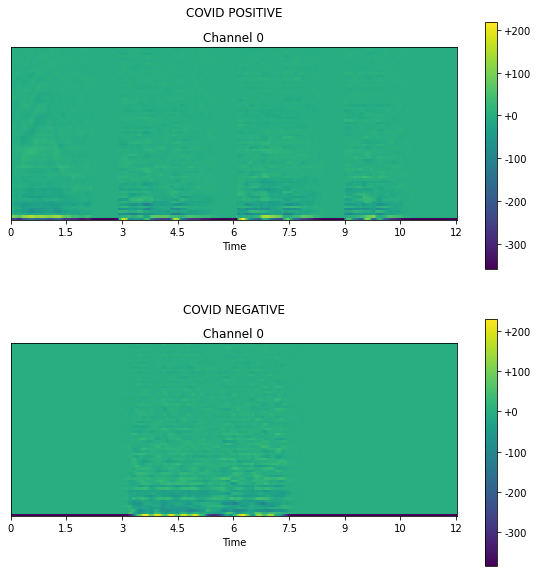

In [ ]:
item_tfms = [crop6s, aud2mfcc]

auds = DataBlock(blocks = (AudioBlock, CategoryBlock),  
                 get_x = ColReader("filename"),
                 splitter = TrainTestSplitter(test_size=0.15, random_state=69, 
                                              stratify=three_df.category.values),
                 item_tfms = item_tfms,
                 get_y = ColReader("category"))


auds.summary(three_df, show_batch=True, figsize=(10, 10))

## Check data distribution

In [ ]:
dls = auds.dataloaders(three_df, bs=32)

for i in range(10):
    x,y = dls.one_batch()
    print(np.unique(y.cpu(), return_counts=True))

print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())

(array([0, 1]), array([27,  5]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([24,  8]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([28,  4]))
(array([0, 1]), array([27,  5]))
(array([0, 1]), array([25,  7]))
(array([0, 1]), array([22, 10]))
(array([0, 1]), array([26,  6]))
(array([0, 1]), array([29,  3]))
COVID NEGATIVE    937
COVID POSITIVE    257
Name: category, dtype: int64
COVID NEGATIVE    166
COVID POSITIVE     45
Name: category, dtype: int64


In [ ]:
test_dl = dls.test_dl(three_df_test, with_labels=True)

In [ ]:
print(dls.train.items.category.value_counts())
print(dls.valid.items.category.value_counts())
print(test_dl.items.category.value_counts())

COVID NEGATIVE    937
COVID POSITIVE    257
Name: category, dtype: int64
COVID NEGATIVE    166
COVID POSITIVE     45
Name: category, dtype: int64
COVID NEGATIVE    195
COVID POSITIVE     53
Name: category, dtype: int64


# Models: Fine-tuning

### ResNet-18

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.105520,0.979355,0.657258,0.650701,01:08


Better model found at epoch 0 with accuracy value: 0.6572580933570862.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.817774,0.702152,0.681452,0.595162,00:35
1,0.670109,0.623806,0.725806,0.687325,00:35
2,0.609190,0.586542,0.758065,0.724045,00:35
3,0.549509,0.534231,0.758065,0.748863,00:36
4,0.481737,0.588290,0.758065,0.716642,00:36
5,0.456483,0.521176,0.782258,0.768070,00:37
6,0.411511,0.523543,0.810484,0.738703,00:37
7,0.367505,0.639167,0.782258,0.719448,00:35
8,0.321553,0.646176,0.794355,0.754330,00:35
9,0.305954,0.684626,0.814516,0.735123,00:35


Better model found at epoch 0 with accuracy value: 0.6814516186714172.
Better model found at epoch 1 with accuracy value: 0.725806474685669.
Better model found at epoch 2 with accuracy value: 0.7580645084381104.
Better model found at epoch 5 with accuracy value: 0.7822580933570862.
Better model found at epoch 6 with accuracy value: 0.8104838728904724.
Better model found at epoch 9 with accuracy value: 0.8145161271095276.
Better model found at epoch 10 with accuracy value: 0.8266128897666931.
Better model found at epoch 21 with accuracy value: 0.8346773982048035.
Better model found at epoch 24 with accuracy value: 0.8387096524238586.
Better model found at epoch 25 with accuracy value: 0.8467742204666138.
Better model found at epoch 30 with accuracy value: 0.850806474685669.
Better model found at epoch 37 with accuracy value: 0.8669354915618896.


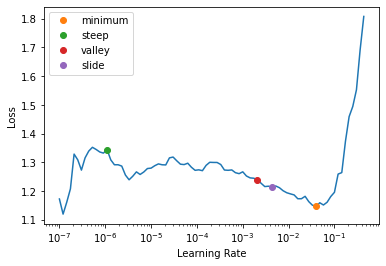

In [ ]:
# resnet 18 model
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

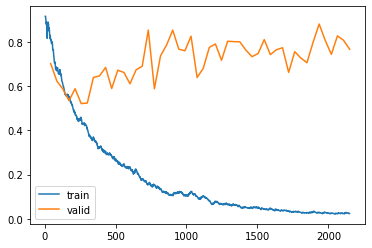

In [ ]:
learn.recorder.plot_loss()

0.8321917808219178 0.7772925764192139 0.715518441196938 0.6916545366327025 0.6916545366327025 0.7633333333333333
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       229
           1       0.67      0.44      0.53        63

    accuracy                           0.83       292
   macro avg       0.76      0.69      0.72       292
weighted avg       0.82      0.83      0.82       292



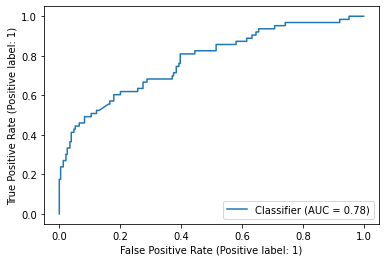

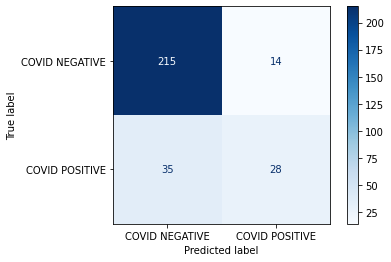

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.194325,0.766291,0.625000,0.694001,00:36


Better model found at epoch 0 with accuracy value: 0.625.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.051708,0.784242,0.612903,0.638171,00:37
1,0.989574,0.790714,0.588710,0.655104,00:36
2,0.912639,0.607497,0.689516,0.707934,00:36
3,0.838072,0.662116,0.677419,0.618723,00:36
4,0.787081,0.625088,0.681452,0.726512,00:36
5,0.735453,0.639676,0.709677,0.656652,00:35
6,0.697685,0.591991,0.721774,0.693033,00:35
7,0.653338,0.614646,0.709677,0.703919,00:35
8,0.567518,0.576257,0.745968,0.709289,00:35
9,0.537451,0.601677,0.750000,0.687034,00:35


Better model found at epoch 0 with accuracy value: 0.6129032373428345.
Better model found at epoch 2 with accuracy value: 0.6895161271095276.
Better model found at epoch 5 with accuracy value: 0.7096773982048035.
Better model found at epoch 6 with accuracy value: 0.7217742204666138.
Better model found at epoch 8 with accuracy value: 0.7459677457809448.
Better model found at epoch 9 with accuracy value: 0.75.
Better model found at epoch 10 with accuracy value: 0.7701612710952759.
Better model found at epoch 13 with accuracy value: 0.7822580933570862.
Better model found at epoch 14 with accuracy value: 0.7943548560142517.
Better model found at epoch 19 with accuracy value: 0.8266128897666931.
Better model found at epoch 34 with accuracy value: 0.8427419066429138.


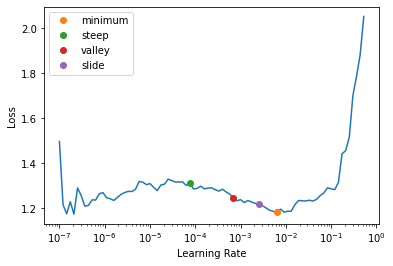

In [ ]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

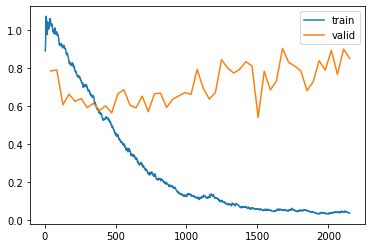

In [ ]:
learn.recorder.plot_loss()

0.7945205479452054 0.7745546544673182 0.6928471248246844 0.6906494766756776 0.6906494766756776 0.6951955148676461
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       229
           1       0.52      0.51      0.52        63

    accuracy                           0.79       292
   macro avg       0.70      0.69      0.69       292
weighted avg       0.79      0.79      0.79       292



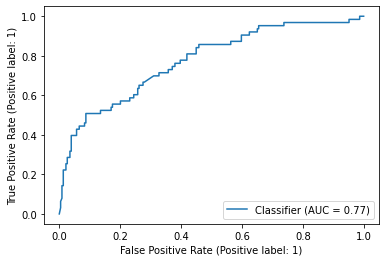

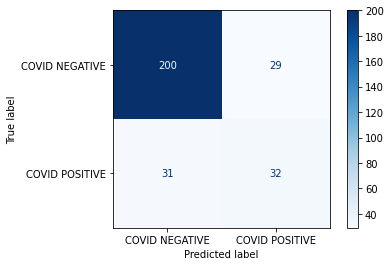

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

# Models: 1cycle policy

### ResNet-18

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.127779,0.790145,0.625000,0.628495,01:24
1,0.987805,0.745099,0.661290,0.623464,00:29
2,0.859919,0.697676,0.750000,0.680552,00:29
3,0.750947,0.795037,0.737903,0.629898,00:29
4,0.661120,0.638786,0.721774,0.673198,00:29
5,0.575958,0.532930,0.794355,0.696710,00:28
6,0.538516,0.690680,0.754032,0.652395,00:28
7,0.509228,0.618791,0.822581,0.737446,00:29
8,0.491480,0.761524,0.697581,0.715481,00:30
9,0.483187,0.728990,0.721774,0.727092,00:30


Better model found at epoch 0 with accuracy value: 0.625.
Better model found at epoch 1 with accuracy value: 0.6612903475761414.
Better model found at epoch 2 with accuracy value: 0.75.
Better model found at epoch 5 with accuracy value: 0.7943548560142517.
Better model found at epoch 7 with accuracy value: 0.8225806355476379.
Better model found at epoch 16 with accuracy value: 0.8346773982048035.
Better model found at epoch 28 with accuracy value: 0.8629032373428345.


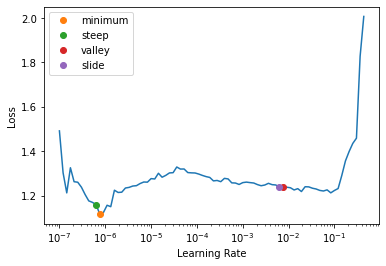

In [ ]:
learn = cnn_learner(dls, resnet18, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

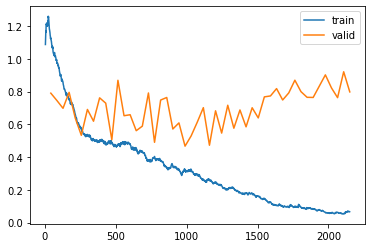

In [ ]:
learn.recorder.plot_loss()

0.7705479452054794 0.7332085672697026 0.6419407383004814 0.635093921120122 0.635093921120122 0.6516495487083722
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       229
           1       0.46      0.40      0.43        63

    accuracy                           0.77       292
   macro avg       0.65      0.64      0.64       292
weighted avg       0.76      0.77      0.76       292



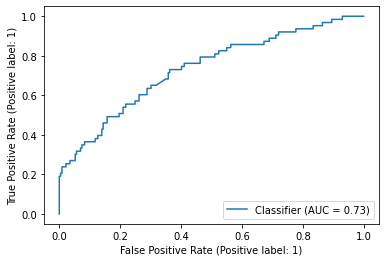

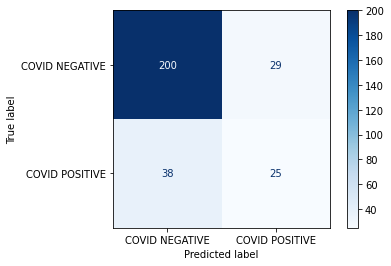

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-34

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.266723,0.780622,0.552419,0.598113,00:27
1,1.177275,0.805331,0.552419,0.555056,00:28
2,1.067472,0.776386,0.564516,0.674843,00:27
3,0.972680,0.648657,0.689516,0.672037,00:27
4,0.877399,0.606799,0.733871,0.703193,00:27
5,0.833035,0.568745,0.737903,0.689550,00:27
6,0.738182,0.612691,0.701613,0.661393,00:27
7,0.669612,0.634472,0.737903,0.692066,00:28
8,0.602121,0.592005,0.733871,0.707257,00:29
9,0.542673,0.566395,0.754032,0.744461,00:28


Better model found at epoch 0 with accuracy value: 0.5524193644523621.
Better model found at epoch 2 with accuracy value: 0.5645161271095276.
Better model found at epoch 3 with accuracy value: 0.6895161271095276.
Better model found at epoch 4 with accuracy value: 0.7338709831237793.
Better model found at epoch 5 with accuracy value: 0.7379032373428345.
Better model found at epoch 9 with accuracy value: 0.7540322542190552.
Better model found at epoch 10 with accuracy value: 0.7943548560142517.
Better model found at epoch 14 with accuracy value: 0.8104838728904724.
Better model found at epoch 16 with accuracy value: 0.8145161271095276.
Better model found at epoch 25 with accuracy value: 0.8185483813285828.
Better model found at epoch 39 with accuracy value: 0.8346773982048035.


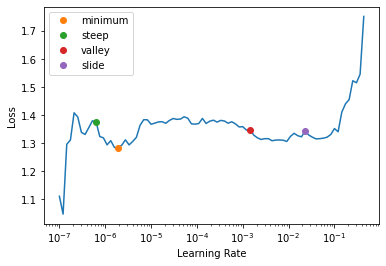

In [ ]:
learn = cnn_learner(dls, resnet34, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

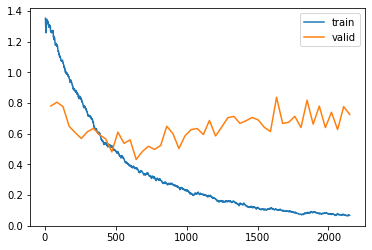

In [ ]:
learn.recorder.plot_loss()

0.7534246575342466	0.7302280446385249	0.6269959548648073	0.6241768905524364	0.6241768905524364	0.6303193424019786
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       229
           1       0.42      0.40      0.41        63

    accuracy                           0.75       292
   macro avg       0.63      0.62      0.63       292
weighted avg       0.75      0.75      0.75       292



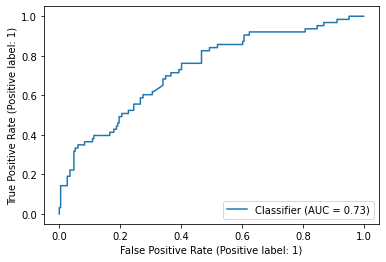

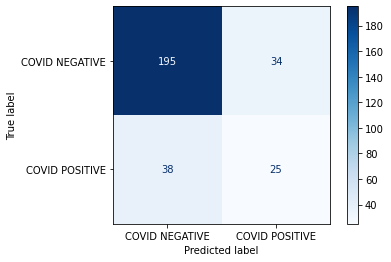

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-50

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.286249,0.928596,0.483871,0.460377,00:29
1,1.261037,0.853373,0.524194,0.581664,00:28
2,1.209067,0.879454,0.536290,0.643106,00:28
3,1.131063,0.756664,0.629032,0.660135,00:29
4,1.089699,0.848573,0.564516,0.625593,00:28
5,1.075902,0.836404,0.608871,0.668360,00:28
6,1.012783,0.795838,0.592742,0.634688,00:28
7,0.957386,0.768119,0.608871,0.649637,00:28
8,0.918077,0.719530,0.637097,0.601693,00:28
9,0.871065,0.642984,0.721774,0.702806,00:28


Better model found at epoch 0 with accuracy value: 0.4838709533214569.
Better model found at epoch 1 with accuracy value: 0.524193525314331.
Better model found at epoch 2 with accuracy value: 0.5362903475761414.
Better model found at epoch 3 with accuracy value: 0.6290322542190552.
Better model found at epoch 8 with accuracy value: 0.6370967626571655.
Better model found at epoch 9 with accuracy value: 0.7217742204666138.
Better model found at epoch 14 with accuracy value: 0.7661290168762207.
Better model found at epoch 15 with accuracy value: 0.7822580933570862.
Better model found at epoch 18 with accuracy value: 0.8104838728904724.
Better model found at epoch 22 with accuracy value: 0.8145161271095276.
Better model found at epoch 34 with accuracy value: 0.8346773982048035.


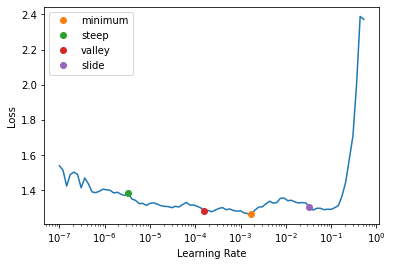

In [ ]:
learn = cnn_learner(dls, resnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

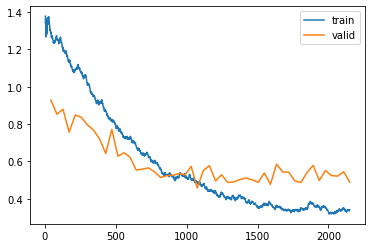

In [ ]:
learn.recorder.plot_loss()

0.8116438356164384	0.7689748388438344	0.6655211912943871	0.6440354890136549	0.6440354890136549	0.7254774305555556
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       229
           1       0.61      0.35      0.44        63

    accuracy                           0.81       292
   macro avg       0.73      0.64      0.67       292
weighted avg       0.79      0.81      0.79       292



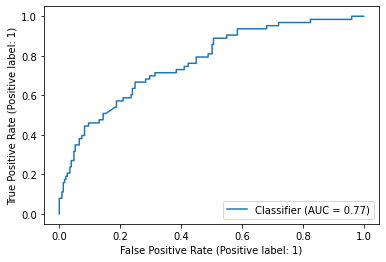

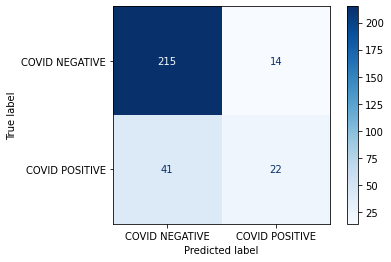

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### ResNet-101

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth


  0%|          | 0.00/170M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.251634,1.041977,0.596774,0.628399,00:30
1,0.998906,0.752544,0.693548,0.660716,00:29
2,0.863971,0.591495,0.709677,0.703580,00:29
3,0.719197,0.663867,0.717742,0.679245,00:29
4,0.605874,0.566387,0.766129,0.670876,00:29
5,0.541956,0.656491,0.705645,0.709144,00:29
6,0.532557,0.604561,0.798387,0.646831,00:29
7,0.508978,0.763076,0.713710,0.717417,00:29
8,0.531589,0.668405,0.669355,0.570053,00:29
9,0.543432,1.192599,0.725806,0.698839,00:29


Better model found at epoch 0 with accuracy value: 0.5967742204666138.
Better model found at epoch 1 with accuracy value: 0.6935483813285828.
Better model found at epoch 2 with accuracy value: 0.7096773982048035.
Better model found at epoch 3 with accuracy value: 0.7177419066429138.
Better model found at epoch 4 with accuracy value: 0.7661290168762207.
Better model found at epoch 6 with accuracy value: 0.7983871102333069.
Better model found at epoch 10 with accuracy value: 0.8024193644523621.
Better model found at epoch 14 with accuracy value: 0.8185483813285828.
Better model found at epoch 17 with accuracy value: 0.8225806355476379.
Better model found at epoch 21 with accuracy value: 0.8346773982048035.
Better model found at epoch 30 with accuracy value: 0.8548387289047241.


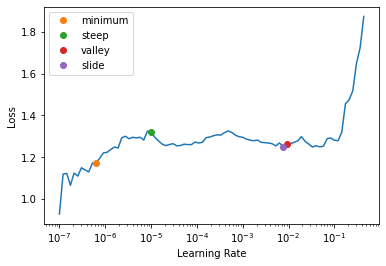

In [ ]:
learn = cnn_learner(dls, resnet101, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

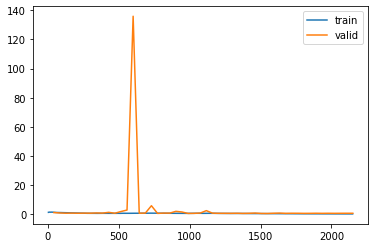

In [ ]:
learn.recorder.plot_loss()

0.8561643835616438	0.7826991058432107	0.7466115702479339	0.7126914812504332	0.7126914812504332	0.8252252252252252
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       229
           1       0.78      0.46      0.58        63

    accuracy                           0.86       292
   macro avg       0.83      0.71      0.75       292
weighted avg       0.85      0.86      0.84       292



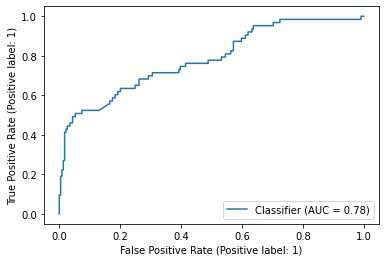

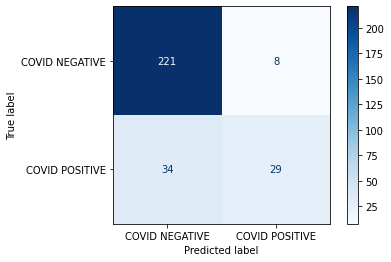

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg16_bn

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.185123,0.840551,0.552419,0.629947,00:30
1,1.057244,0.761439,0.596774,0.625060,00:29
2,0.960685,0.641724,0.653226,0.650169,00:29
3,0.842058,0.569275,0.745968,0.669521,00:29
4,0.721648,0.592117,0.701613,0.699081,00:29
5,0.624660,0.623215,0.766129,0.670295,00:29
6,0.571374,0.559114,0.766129,0.742671,00:29
7,0.512963,0.575403,0.794355,0.716642,00:29
8,0.487135,0.510567,0.806452,0.756604,00:30
9,0.419556,0.588608,0.794355,0.718771,00:29


Better model found at epoch 0 with accuracy value: 0.5524193644523621.
Better model found at epoch 1 with accuracy value: 0.5967742204666138.
Better model found at epoch 2 with accuracy value: 0.6532257795333862.
Better model found at epoch 3 with accuracy value: 0.7459677457809448.
Better model found at epoch 5 with accuracy value: 0.7661290168762207.
Better model found at epoch 7 with accuracy value: 0.7943548560142517.
Better model found at epoch 8 with accuracy value: 0.8064516186714172.
Better model found at epoch 15 with accuracy value: 0.8185483813285828.
Better model found at epoch 16 with accuracy value: 0.8346773982048035.
Better model found at epoch 25 with accuracy value: 0.8387096524238586.
Better model found at epoch 28 with accuracy value: 0.850806474685669.
Better model found at epoch 47 with accuracy value: 0.8669354915618896.


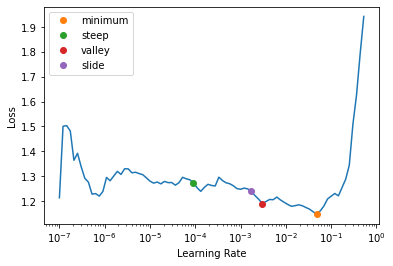

In [ ]:
learn = cnn_learner(dls, vgg16_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

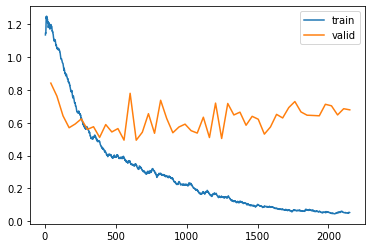

In [ ]:
learn.recorder.plot_loss()

0.8082191780821918	0.7817980176058779	0.677271650746033	0.6591113883690303	0.6591113883690303	0.7143924535350705
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       229
           1       0.58      0.40      0.47        63

    accuracy                           0.81       292
   macro avg       0.71      0.66      0.68       292
weighted avg       0.79      0.81      0.79       292



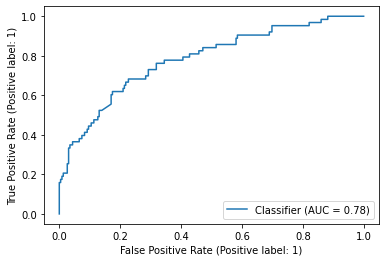

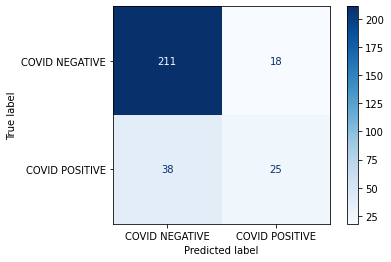

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### vgg19_bn

Downloading: "https://download.pytorch.org/models/vgg19_bn-c79401a0.pth" to /root/.cache/torch/hub/checkpoints/vgg19_bn-c79401a0.pth


  0%|          | 0.00/548M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.176512,0.696573,0.645161,0.628060,00:29
1,0.987500,0.621300,0.669355,0.735704,00:29
2,0.846120,0.609038,0.673387,0.697920,00:29
3,0.752596,0.718295,0.653226,0.624915,00:29
4,0.661732,0.556549,0.782258,0.706918,00:29
5,0.576596,0.540205,0.774194,0.710837,00:30
6,0.522466,0.558207,0.762097,0.717320,00:30
7,0.458327,0.664133,0.737903,0.718771,00:30
8,0.419010,0.685925,0.774194,0.725544,00:29
9,0.418755,0.568127,0.806452,0.753314,00:30


Better model found at epoch 0 with accuracy value: 0.6451612710952759.
Better model found at epoch 1 with accuracy value: 0.6693548560142517.
Better model found at epoch 2 with accuracy value: 0.6733871102333069.
Better model found at epoch 4 with accuracy value: 0.7822580933570862.
Better model found at epoch 9 with accuracy value: 0.8064516186714172.
Better model found at epoch 11 with accuracy value: 0.8145161271095276.
Better model found at epoch 13 with accuracy value: 0.8346773982048035.
Better model found at epoch 41 with accuracy value: 0.8427419066429138.


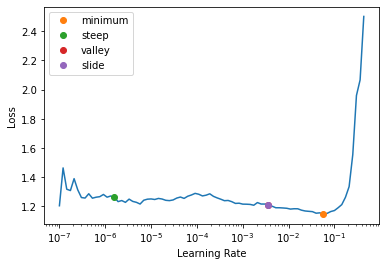

In [ ]:
learn = cnn_learner(dls, vgg19_bn, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

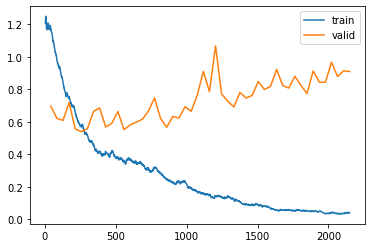

In [ ]:
learn.recorder.plot_loss()

0.815068493150685	0.7753517709849588	0.709549071618037	0.6979968115339295	0.6979968115339295	0.7255072234941186
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       229
           1       0.58      0.49      0.53        63

    accuracy                           0.82       292
   macro avg       0.73      0.70      0.71       292
weighted avg       0.81      0.82      0.81       292



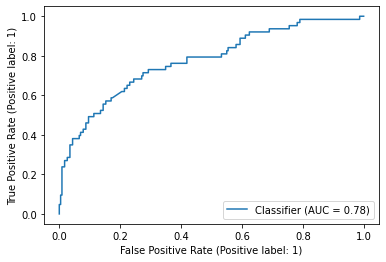

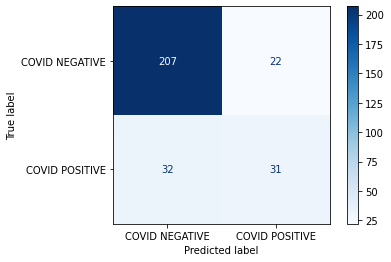

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### squeezenet1_0

Downloading: "https://download.pytorch.org/models/squeezenet1_0-a815701f.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-a815701f.pth


  0%|          | 0.00/4.79M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.271327,1.972883,0.556452,0.516207,00:27
1,1.206055,0.915165,0.665323,0.569328,00:27
2,1.079853,5.939852,0.673387,0.628447,00:28
3,0.954238,0.729639,0.705645,0.631785,00:28
4,0.802993,10.766258,0.750000,0.586986,00:28
5,0.770580,2.250478,0.758065,0.655346,00:28
6,0.692170,5.009063,0.729839,0.670924,00:28
7,0.651858,0.945754,0.794355,0.695452,00:28
8,0.604288,0.743808,0.782258,0.636333,00:28
9,0.562544,1.783769,0.733871,0.664103,00:28


Better model found at epoch 0 with accuracy value: 0.5564516186714172.
Better model found at epoch 1 with accuracy value: 0.6653226017951965.
Better model found at epoch 2 with accuracy value: 0.6733871102333069.
Better model found at epoch 3 with accuracy value: 0.7056451439857483.
Better model found at epoch 4 with accuracy value: 0.75.
Better model found at epoch 5 with accuracy value: 0.7580645084381104.
Better model found at epoch 7 with accuracy value: 0.7943548560142517.
Better model found at epoch 21 with accuracy value: 0.7983871102333069.
Better model found at epoch 31 with accuracy value: 0.8145161271095276.


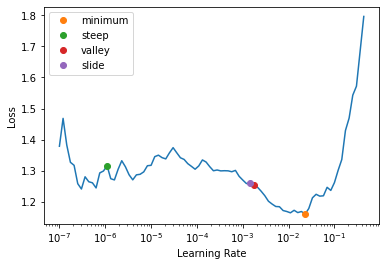

In [ ]:
learn = cnn_learner(dls, squeezenet1_0, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

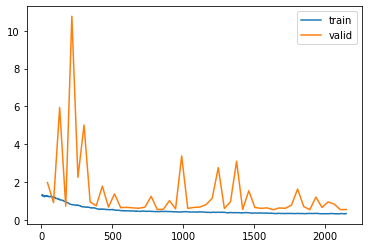

In [ ]:
learn.recorder.plot_loss()

0.8082191780821918	0.7234005683787343	0.6673989097713775	0.6476051847230886	0.6476051847230886	0.7158204114725855
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       229
           1       0.59      0.37      0.45        63

    accuracy                           0.81       292
   macro avg       0.72      0.65      0.67       292
weighted avg       0.79      0.81      0.79       292



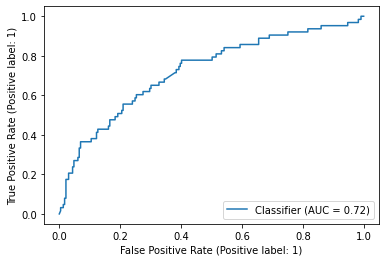

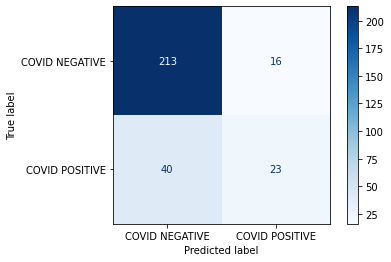

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### densenet121

### alexnet

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.030849,0.920114,0.720379,0.673293,00:23


Better model found at epoch 0 with accuracy value: 0.7203791737556458.


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.709079,0.791715,0.729858,0.644779,00:23
1,0.629219,8.420583,0.786730,0.724498,00:24
2,0.605234,0.490602,0.791469,0.759906,00:23
3,0.594250,0.569906,0.739336,0.705556,00:23
4,0.568888,0.570044,0.786730,0.742905,00:23
5,0.532992,0.539706,0.781991,0.754284,00:23
6,0.522028,0.493467,0.786730,0.747992,00:23
7,0.537302,0.582999,0.691943,0.673829,00:23
8,0.523135,3.220332,0.748815,0.724297,00:23
9,0.523505,0.762123,0.739336,0.709036,00:23


Better model found at epoch 0 with accuracy value: 0.7298578023910522.
Better model found at epoch 1 with accuracy value: 0.7867298722267151.
Better model found at epoch 2 with accuracy value: 0.7914692163467407.
Better model found at epoch 11 with accuracy value: 0.8009478449821472.
Better model found at epoch 12 with accuracy value: 0.8246445655822754.
Better model found at epoch 18 with accuracy value: 0.8388625383377075.
Better model found at epoch 31 with accuracy value: 0.8483412265777588.
Better model found at epoch 40 with accuracy value: 0.8530805706977844.
Better model found at epoch 44 with accuracy value: 0.8578199148178101.


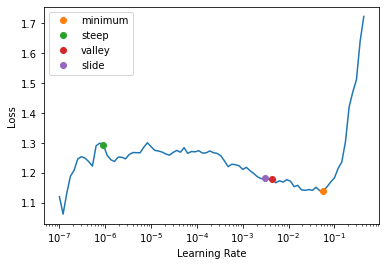

In [ ]:
learn = cnn_learner(dls, alexnet, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fine_tune(50, lrs.valley)

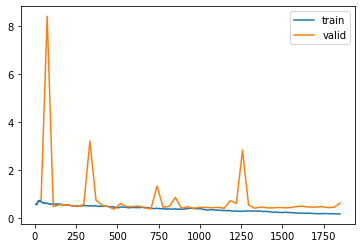

In [ ]:
learn.recorder.plot_loss()

0.8104838709677419	0.7785195936139332	0.672427844757328	0.6527818093855831	0.6527818093855831	0.7170148433205058
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       195
           1       0.59      0.38      0.46        53

    accuracy                           0.81       248
   macro avg       0.72      0.65      0.67       248
weighted avg       0.79      0.81      0.79       248



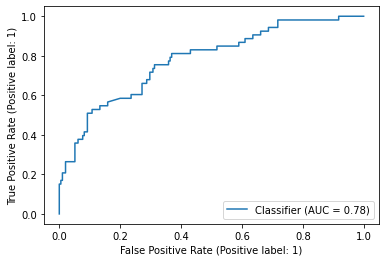

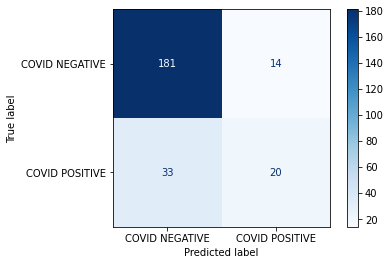

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


  0%|          | 0.00/30.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.187807,0.736661,0.604839,0.563232,00:32
1,1.035733,0.609821,0.661290,0.688631,00:30
2,0.904769,0.556429,0.782258,0.746880,00:31
3,0.783371,0.580450,0.766129,0.732801,00:30
4,0.685547,0.672527,0.725806,0.692211,00:30
5,0.609756,0.512999,0.806452,0.765506,00:30
6,0.523240,0.528808,0.790323,0.734930,00:31
7,0.458198,0.529467,0.786290,0.720997,00:31
8,0.423999,0.692869,0.693548,0.711224,00:30
9,0.439327,0.638662,0.733871,0.731108,00:31


Better model found at epoch 0 with accuracy value: 0.6048387289047241.
Better model found at epoch 1 with accuracy value: 0.6612903475761414.
Better model found at epoch 2 with accuracy value: 0.7822580933570862.
Better model found at epoch 5 with accuracy value: 0.8064516186714172.
Better model found at epoch 12 with accuracy value: 0.8225806355476379.
Better model found at epoch 18 with accuracy value: 0.8427419066429138.


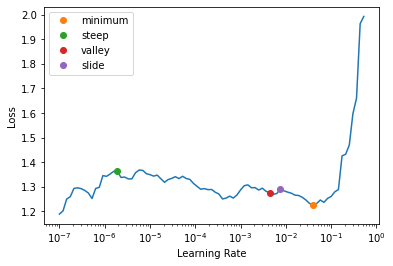

In [ ]:
learn = cnn_learner(dls, densenet121, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

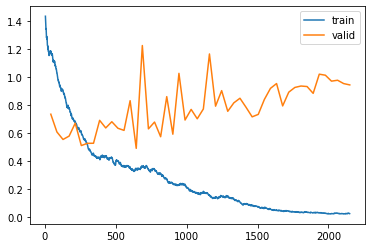

In [ ]:
learn.recorder.plot_loss()

0.7705479452054794	0.7840853954391072	0.6772416068629876	0.6868718375268593	0.6868718375268593	0.6702020202020202
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       229
           1       0.47      0.54      0.50        63

    accuracy                           0.77       292
   macro avg       0.67      0.69      0.68       292
weighted avg       0.78      0.77      0.78       292



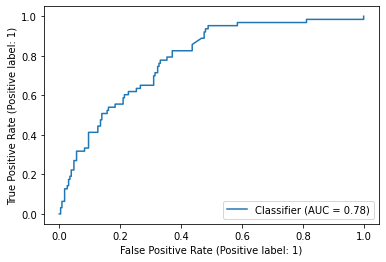

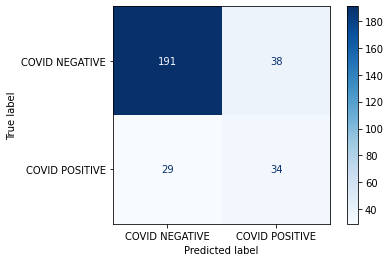

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### xresnet50

Downloading: "https://s3.amazonaws.com/fast-ai-modelzoo/xrn50_940.pth" to /root/.cache/torch/hub/checkpoints/xrn50_940.pth


  0%|          | 0.00/244M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.231060,0.806083,0.653226,0.614659,00:28
1,1.049733,1.023879,0.713710,0.686405,00:28
2,0.866807,0.541222,0.713710,0.691485,00:28
3,0.730931,0.567865,0.786290,0.696420,00:28
4,0.637462,0.565586,0.786290,0.708563,00:27
5,0.599109,0.521330,0.774194,0.719061,00:28
6,0.547445,0.487294,0.818548,0.736091,00:28
7,0.529723,0.465526,0.830645,0.751089,00:28
8,0.506487,0.511636,0.834677,0.729995,00:28
9,0.481849,0.648743,0.770161,0.710111,00:28


Better model found at epoch 0 with accuracy value: 0.6532257795333862.
Better model found at epoch 1 with accuracy value: 0.7137096524238586.
Better model found at epoch 3 with accuracy value: 0.7862903475761414.
Better model found at epoch 6 with accuracy value: 0.8185483813285828.
Better model found at epoch 7 with accuracy value: 0.8306451439857483.
Better model found at epoch 8 with accuracy value: 0.8346773982048035.
Better model found at epoch 11 with accuracy value: 0.8387096524238586.
Better model found at epoch 17 with accuracy value: 0.8467742204666138.
Better model found at epoch 40 with accuracy value: 0.8588709831237793.


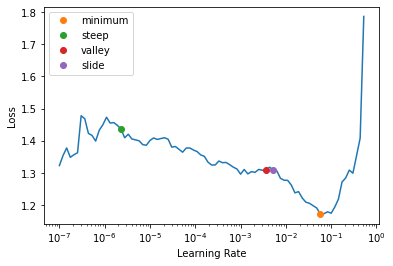

In [ ]:
learn = cnn_learner(dls, xresnet50, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

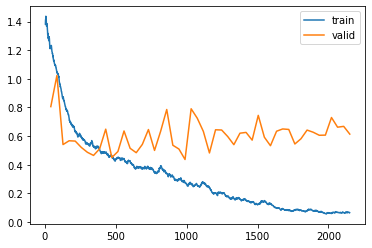

In [ ]:
learn.recorder.plot_loss()

0.8082191780821918	0.7589242392735842	0.7026260274969085	0.6936299993068552	0.6936299993068552	0.714307633294975
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       229
           1       0.56      0.49      0.53        63

    accuracy                           0.81       292
   macro avg       0.71      0.69      0.70       292
weighted avg       0.80      0.81      0.80       292



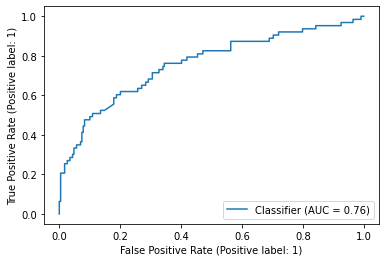

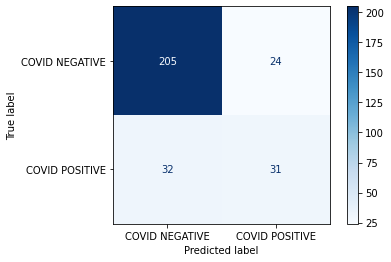

In [ ]:
xx = learn.load("/content/models/model")

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')
#print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()

### alexnet

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.140302,0.848288,0.592417,0.572088,00:23
1,1.089844,1.343842,0.620853,0.541165,00:23
2,0.937483,2.450997,0.649289,0.636747,00:23
3,0.858799,1.137762,0.725118,0.625636,00:23
4,0.770877,0.605229,0.734597,0.668876,00:23
5,0.687956,1.269991,0.739336,0.617336,00:23
6,0.658566,1.673740,0.786730,0.708501,00:23
7,0.627756,0.665696,0.758294,0.708501,00:23
8,0.604095,0.528726,0.796209,0.739290,00:23
9,0.570297,0.715337,0.767772,0.719344,00:23


Better model found at epoch 0 with accuracy value: 0.5924170613288879.
Better model found at epoch 1 with accuracy value: 0.620853066444397.
Better model found at epoch 2 with accuracy value: 0.649289071559906.
Better model found at epoch 3 with accuracy value: 0.7251184582710266.
Better model found at epoch 4 with accuracy value: 0.7345971465110779.
Better model found at epoch 5 with accuracy value: 0.7393364906311035.
Better model found at epoch 6 with accuracy value: 0.7867298722267151.
Better model found at epoch 8 with accuracy value: 0.7962085604667664.
Better model found at epoch 22 with accuracy value: 0.829383909702301.


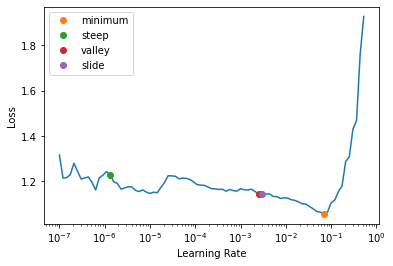

In [ ]:
learn = cnn_learner(dls, alexnet, # <- model
                    n_in=1,  # <- This is the only audio specific modification here
                    metrics=[accuracy, RocAucBinary(average='macro')],
                    cbs=(SaveModelCallback(monitor='accuracy', with_opt=True))
                   )

# Find Learning Rate
lrs = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

# Run 
learn.fit_one_cycle(50, lrs.valley)

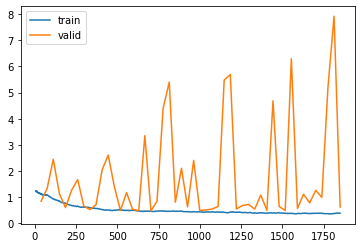

In [ ]:
learn.recorder.plot_loss()

0.7540322580645161	0.7031930333817126	0.6028875180469877	0.5962747943880019	0.5962747943880019	0.6150023116042533
^^    accuracy, rocauc, f1, recall, specificity, precision    ^^
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       195
           1       0.40      0.32      0.36        53

    accuracy                           0.75       248
   macro avg       0.62      0.60      0.60       248
weighted avg       0.74      0.75      0.74       248



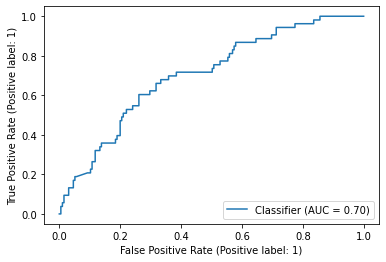

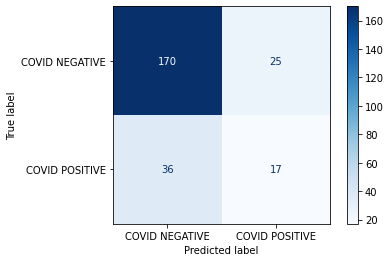

In [ ]:
xx = learn.load('/content/models/model')

pred_probas, actual_classes, pred_classes = xx.get_preds(dl=test_dl, with_decoded=True)

acc = accuracy_score(actual_classes, pred_classes)
rocauc = roc_auc_score(actual_classes, pred_probas[:, 1], average='macro')
fone= f1_score(actual_classes, pred_classes, average='macro')
rec = recall_score(actual_classes, pred_classes, average='macro')
prec = precision_score(actual_classes, pred_classes, average='macro')
spc = specificity_score(actual_classes, pred_classes, average='macro')


print(str(acc)+'\t'+str(rocauc)+'\t'+str(fone)+'\t'+ str(rec)+'\t'+str(spc)+'\t'+ str(prec))
print('^^    accuracy, rocauc, f1, recall, specificity, precision    ^^')

print(classification_report(actual_classes, pred_classes))       
RocCurveDisplay.from_predictions(actual_classes, pred_probas[:, 1])
plt.show()

ConfusionMatrixDisplay.from_predictions(actual_classes, pred_classes, 
                                        display_labels=test_dl.vocab,cmap=plt.cm.Blues)
plt.show()